## Grobid

In [ ]:
docker run -t --rm -p 8070:8070 lfoppiano/grobid:0.7.1

In [28]:
import requests

pdf_path = "/home/XXXX.pdf"
url = "http://localhost:8070/api/processFulltextDocument"

with open(pdf_path, "rb") as pdf_file:
    response = requests.post(url, files={"input": pdf_file})

if response.status_code == 200:
    with open("output.xml", "wb") as f:
        f.write(response.content)
    print("Saved parsed XML to output.xml")
else:
    print(f"Error: {response.status_code}")


Saved parsed XML to output.xml


In [33]:
pip install lxml

Note: you may need to restart the kernel to use updated packages.


In [1]:
from lxml import etree

# Load XML file
tree = etree.parse("output.xml")
root = tree.getroot()

# TEI namespace
ns = {'tei': 'http://www.tei-c.org/ns/1.0'}

In [2]:
title = root.xpath('//tei:titleStmt/tei:title/text()', namespaces=ns)
print("Title:", title[0] if title else "Not found")

Title: Quantum like modelling of the non-separability of voters' preferences in the U.S. political system


In [25]:
authors = root.xpath('//tei:author/tei:persName', namespaces=ns)
for i, author in enumerate(authors, 1):
    fname = author.find('tei:forename', namespaces=ns)
    lname = author.find('tei:surname', namespaces=ns)
    #print(f"Author {i}:", f"{fname.text if fname is not None else ''} {lname.text if lname is not None else ''}")


In [4]:
abstract = root.xpath('//tei:abstract//tei:p/text()', namespaces=ns)
print("Abstract:", " ".join(abstract))

Abstract: Divided Government is nowadays a common feature of the US political system. The voters can cast partisan ballots for two political powers the executive (Presidential elections) and the legislative (the Congress election). Some recent studies have shown that many voters tend to shape their preferences for the political parties by choosing different parties in these two election contests. This type of behavior referred to by   as "ticket splitting" shows irrationality of behavior (such as preference reversal) from the perspective of traditional decision making theories (Von Neumann and Morgenstern (1953), Savage, (1954)). It has been shown by i.e. Zorn and Smith (2011) and also   that these types of 'non-separable' preferences are context dependent and can be well accommodated in a quantum like framework. In this paper we use data from   to show first of all probabilistic violation of classical (Kolmogorovian) framework. We proceed with the depiction of our observables (the Con

In [7]:
sections = root.xpath('//tei:text//tei:div', namespaces={'tei': 'http://www.tei-c.org/ns/1.0'})

for i, sec in enumerate(sections, 1):
    head = sec.find('tei:head', namespaces={'tei': 'http://www.tei-c.org/ns/1.0'})
    paras = sec.findall('tei:p', namespaces={'tei': 'http://www.tei-c.org/ns/1.0'})
    
    print(f"\nSection {i}: {head.text if head is not None else 'No Heading'}")
    
    for j, para in enumerate(paras, 1):
        full_text = "".join(para.itertext()).strip()
        print(f"  Paragraph {j}: {full_text}")
        print("\n")



Section 1: Introduction
  Paragraph 1: The application of the quantum models to phenomena outside the remit of quantum physics is not longer perceived as something exotic despite the novelty of this interdisciplinary field. The quantum like models that actively pursue the mathematical framework and concepts of quantum physics to other social phenomena serve as an effective explanatory and descriptive instrument. The philosophy of the application at this stage bears an phenomenological character, without the claim that the social and cognitive systems are exhibiting quantum features ( i.e. that that human brain is a huge quantum system where neurons act like quantum particles). The domain of applications includes primarily decision making problems in economics and cognitive science 1 (Bruza et al., (2009), Busemeyer et al., (2006aBusemeyer et al., ( , 2006bBusemeyer et al., ( , 2007)), Franco et al. (2009), Haven and Khrennikov (2009), Photos and Busemeyer (2009), Lambert-Mogilansky an

In [21]:
import re

sections = root.xpath('//tei:text//tei:div', namespaces={'tei': 'http://www.tei-c.org/ns/1.0'})

for i, sec in enumerate(sections, 1):
    ns = {'tei': 'http://www.tei-c.org/ns/1.0'}
    head = sec.find('tei:head', namespaces=ns)
    paras = sec.findall('tei:p', namespaces=ns)

    # Step 1: Get raw heading text or fallback
    raw_heading = head.text.strip() if head is not None and head.text else ""

    # Step 2: If heading is empty or looks like a number (e.g., "1.1", "2", etc.)
    
    if not raw_heading or re.fullmatch(r'[\d.]+', raw_heading):
        # Try using the first paragraph as heading (if it exists)
        if paras:
            heading_text = "".join(paras[0].itertext()).strip()
            paras = paras[1:]  # Skip it from paragraphs
        else:
            heading_text = "No Heading"
    
    else:
        heading_text = raw_heading

    print(f"\nSection {i}: {heading_text}")

    # Print remaining paragraphs
    for j, para in enumerate(paras, 1):
        full_text = "".join(para.itertext()).strip()
        print(f"  Paragraph {j}: {full_text}")
        print("\n")



Section 1: Introduction
  Paragraph 1: The application of the quantum models to phenomena outside the remit of quantum physics is not longer perceived as something exotic despite the novelty of this interdisciplinary field. The quantum like models that actively pursue the mathematical framework and concepts of quantum physics to other social phenomena serve as an effective explanatory and descriptive instrument. The philosophy of the application at this stage bears an phenomenological character, without the claim that the social and cognitive systems are exhibiting quantum features ( i.e. that that human brain is a huge quantum system where neurons act like quantum particles). The domain of applications includes primarily decision making problems in economics and cognitive science 1 (Bruza et al., (2009), Busemeyer et al., (2006aBusemeyer et al., ( , 2006bBusemeyer et al., ( , 2007)), Franco et al. (2009), Haven and Khrennikov (2009), Photos and Busemeyer (2009), Lambert-Mogilansky an

In [22]:
import re

def looks_like_equation(text):
    # Simple heuristic to identify equations
    math_symbols = ['=', '+', '-', '*', '/', '(', ')', '|', '<', '>', '≠', '≥', '≤']
    greek_letters = ['α', 'β', 'γ', 'δ', 'ε', 'θ', 'λ', 'μ', 'π', 'σ', 'φ', 'ψ', 'ω']

    if sum(sym in text for sym in math_symbols) >= 2:
        return True
    if any(gl in text for gl in greek_letters):
        return True
    if re.search(r'[A-Z]=', text):  # e.g., "P=D"
        return True
    return False

# Extract sections
sections = root.xpath('//tei:text//tei:div', namespaces={'tei': 'http://www.tei-c.org/ns/1.0'})

for i, sec in enumerate(sections, 1):
    ns = {'tei': 'http://www.tei-c.org/ns/1.0'}
    head = sec.find('tei:head', namespaces=ns)
    paras = sec.findall('tei:p', namespaces=ns)

    # Get raw heading text
    raw_heading = head.text.strip() if head is not None and head.text else ""

    # Default heading fallback
    heading_text = "No Heading"

    if not raw_heading or re.fullmatch(r'[\d.]+', raw_heading):
        # If heading is missing or just a number, try promoting the first paragraph
        if paras:
            heading_text = "".join(paras[0].itertext()).strip()
            heading_text = last_valid_heading
            paras = paras[1:]
    elif looks_like_equation(raw_heading):
        # Treat equation-style heading as part of the first paragraph
        if paras:
            first_para = "".join(paras[0].itertext()).strip()
            combined = f"{raw_heading} {first_para}"
            print(f"\nSection {i}: {heading_text}")
            print(f"  Paragraph 1: {combined}")
            # Print remaining paragraphs
            for j, para in enumerate(paras[1:], 2):
                full_text = "".join(para.itertext()).strip()
                print(f"  Paragraph {j}: {full_text}\n")
            continue  # Skip rest of this iteration since we've handled everything
        else:
            print(f"\nSection {i}: {heading_text}")
            print(f"  Paragraph 1: {raw_heading}")
            continue
    else:
        heading_text = raw_heading

    # Print normal section heading
    print(f"\nSection {i}: {heading_text}")

    # Print paragraphs
    for j, para in enumerate(paras, 1):
        full_text = "".join(para.itertext()).strip()
        print(f"  Paragraph {j}: {full_text}\n")



Section 1: Introduction
  Paragraph 1: The application of the quantum models to phenomena outside the remit of quantum physics is not longer perceived as something exotic despite the novelty of this interdisciplinary field. The quantum like models that actively pursue the mathematical framework and concepts of quantum physics to other social phenomena serve as an effective explanatory and descriptive instrument. The philosophy of the application at this stage bears an phenomenological character, without the claim that the social and cognitive systems are exhibiting quantum features ( i.e. that that human brain is a huge quantum system where neurons act like quantum particles). The domain of applications includes primarily decision making problems in economics and cognitive science 1 (Bruza et al., (2009), Busemeyer et al., (2006aBusemeyer et al., ( , 2006bBusemeyer et al., ( , 2007)), Franco et al. (2009), Haven and Khrennikov (2009), Photos and Busemeyer (2009), Lambert-Mogilansky an

## Final for one paper

In [52]:
import xml.etree.ElementTree as ET
import csv
import nltk
from nltk.tokenize import sent_tokenize

# Ensure punkt tokenizer is downloaded

# Load XML
tree = ET.parse("output.xml")
root = tree.getroot()

# Define TEI namespace
ns = {'tei': 'http://www.tei-c.org/ns/1.0'}

# Helper function to count sentences using NLTK
def count_sentences(text):
    return len(sent_tokenize(text))

# Extract title
title = root.find('.//tei:titleStmt/tei:title', namespaces=ns)
title_text = title.text.strip() if title is not None else "No Title"

# Extract abstract
abstract_elem = root.find('.//tei:profileDesc/tei:abstract', namespaces=ns)
if abstract_elem is not None:
    p_elems = abstract_elem.findall('tei:p', namespaces=ns)
    if p_elems:
        abstract_text = " ".join("".join(p.itertext()).strip() for p in p_elems)
    else:
        abstract_text = "".join(abstract_elem.itertext()).strip()
else:
    abstract_text = "No Abstract"

# Extract sections and merge paragraphs with fewer than 5 sentences
rows = []
body = root.find('.//tei:text/tei:body', namespaces=ns)
if body is not None:
    for div in body.findall('.//tei:div', namespaces=ns):
        head = div.find('tei:head', namespaces=ns)
        section_name = head.text.strip() if head is not None else "No Heading"

        buffer = ""
        for p in div.findall('tei:p', namespaces=ns):
            para_text = "".join(p.itertext()).strip()
            sentence_count = count_sentences(para_text)

            if sentence_count < 3:
                buffer += " " + para_text
                continue

            if buffer:
                para_text = buffer.strip() + " " + para_text
                buffer = ""
            rows.append([title_text, abstract_text, section_name, para_text])

        # Add leftover buffer if not empty
        if buffer.strip():
            rows.append([title_text, abstract_text, section_name, buffer.strip()])

# Write to CSV
with open("parsed_output.csv", mode="w", newline='', encoding="utf-8") as f:
    writer = csv.writer(f)
    writer.writerow(["title", "abstract", "section", "paragraph"])
    writer.writerows(rows)

print(f"✅ Data written to parsed_output.csv ({len(rows)} rows)")


✅ Data written to parsed_output.csv (34 rows)


## Download CVPR Papers (Without Supplemental pdfs) *****

In [58]:
import os
import requests
from bs4 import BeautifulSoup
from urllib.parse import urljoin

# URL of the page listing papers for a specific day
BASE_URL = "https://openaccess.thecvf.com"
DAY_URL = "https://openaccess.thecvf.com/CVPR2020?day=2020-06-16"

# Folder to save PDFs
SAVE_DIR = "cvpr2020_no_supp_pdf"
os.makedirs(SAVE_DIR, exist_ok=True)

def download_pdf(pdf_url, save_path):
    print(f"Downloading {pdf_url}")
    try:
        response = requests.get(pdf_url)
        response.raise_for_status()
        with open(save_path, "wb") as f:
            f.write(response.content)
        print(f"Saved to {save_path}")
    except Exception as e:
        print(f"Failed to download {pdf_url}: {e}")

def main():
    # Fetch the webpage
    response = requests.get(DAY_URL)
    soup = BeautifulSoup(response.text, "html.parser")

    # Find all PDF links
    pdf_links = soup.find_all('a', href=lambda href: href and href.endswith('.pdf'))

    print(f"Found {len(pdf_links)} PDF links.")

    for link in pdf_links:
        pdf_relative_url = link.get('href')

        # Skip supplemental PDFs
        if 'supplemental' in pdf_relative_url.lower():
            continue

        pdf_url = urljoin(BASE_URL, pdf_relative_url)
        filename = pdf_relative_url.split("/")[-1]
        save_path = os.path.join(SAVE_DIR, filename)

        if os.path.exists(save_path):
            print(f"Already downloaded: {filename}")
            continue

        download_pdf(pdf_url, save_path)

if __name__ == "__main__":
    main()


Found 739 PDF links.
Saved to cvpr2020_no_supp_pdf/Wang_Dual_Super-Resolution_Learning_for_Semantic_Segmentation_CVPR_2020_paper.pdf
Saved to cvpr2020_no_supp_pdf/Zhang_Deep_Unfolding_Network_for_Image_Super-Resolution_CVPR_2020_paper.pdf
Saved to cvpr2020_no_supp_pdf/Liu_Unsupervised_Learning_for_Intrinsic_Image_Decomposition_From_a_Single_Image_CVPR_2020_paper.pdf
Saved to cvpr2020_no_supp_pdf/Yu_COCAS_A_Large-Scale_Clothes_Changing_Person_Dataset_for_Re-Identification_CVPR_2020_paper.pdf
Saved to cvpr2020_no_supp_pdf/Verelst_Dynamic_Convolutions_Exploiting_Spatial_Sparsity_for_Faster_Inference_CVPR_2020_paper.pdf
Saved to cvpr2020_no_supp_pdf/Tao_Alleviation_of_Gradient_Exploding_in_GANs_Fake_Can_Be_Real_CVPR_2020_paper.pdf
Saved to cvpr2020_no_supp_pdf/Qin_Forward_and_Backward_Information_Retention_for_Accurate_Binary_Neural_Networks_CVPR_2020_paper.pdf
Saved to cvpr2020_no_supp_pdf/Yan_Cooling-Shrinking_Attack_Blinding_the_Tracker_With_Imperceptible_Noises_CVPR_2020_paper.pdf
Save

## NeuIPS Paper Download *****

In [70]:
import requests
from bs4 import BeautifulSoup
import os
import time
from urllib.parse import urljoin

# Configuration
BASE_URL = "https://papers.nips.cc/paper/2020"
OUTPUT_DIR = "neurips_2020_pdf"
MAX_PAPERS = 500  # Number of papers to download
REQUEST_DELAY = 1  # Delay between requests in seconds (be polite to the server)

# Create output directory if it doesn't exist
os.makedirs(OUTPUT_DIR, exist_ok=True)

def get_paper_links():
    """Get all paper links from the NeurIPS 2020 proceedings page."""
    print("Fetching paper list...")
    response = requests.get(BASE_URL)
    soup = BeautifulSoup(response.text, 'html.parser')
    
    paper_links = []
    for link in soup.find_all('a'):
        href = link.get('href')
        if href and '/paper/' in href and not href.endswith('/2020'):
            full_url = urljoin(BASE_URL, href)
            paper_links.append(full_url)
    
    return paper_links[:MAX_PAPERS]

def download_paper(paper_url, count, total):
    """Download a single paper given its URL."""
    try:
        paper_response = requests.get(paper_url)
        paper_soup = BeautifulSoup(paper_response.text, 'html.parser')
        
        # Find PDF link
        pdf_link = None
        for link in paper_soup.find_all('a'):
            if 'Paper' in link.text:
                pdf_link = urljoin(paper_url, link.get('href'))
                break
        
        if not pdf_link:
            print(f"No PDF link found for {paper_url}")
            return False
        
        # Extract paper title for filename
        title = paper_soup.find('h4').text.strip() if paper_soup.find('h4') else 'unknown'
        filename = f"{count:03d}_{title.replace(' ', '_').replace('/', '-')[:100]}.pdf"
        filepath = os.path.join(OUTPUT_DIR, filename)
        
        # Download PDF
        print(f"Downloading [{count}/{total}]: {title}")
        pdf_response = requests.get(pdf_link)
        
        with open(filepath, 'wb') as f:
            f.write(pdf_response.content)
        
        return True
    
    except Exception as e:
        print(f"Error downloading {paper_url}: {str(e)}")
        return False

def main():
    paper_links = get_paper_links()
    total_papers = len(paper_links)
    print(f"Found {total_papers} papers. Downloading...")
    
    success_count = 0
    for i, paper_url in enumerate(paper_links, 1):
        if download_paper(paper_url, i, total_papers):
            success_count += 1
        time.sleep(REQUEST_DELAY)  # Be polite to the server
    
    print(f"\nDownload complete! {success_count}/{total_papers} papers downloaded successfully.")

if __name__ == "__main__":
    main()

Fetching paper list...
Found 500 papers. Downloading...

Download complete! 500/500 papers downloaded successfully.


## Download icollite (2018-2021) + iclccs 2020 Atlantis Press *****

In [141]:
import os
import requests
import time
from bs4 import BeautifulSoup

DOWNLOAD_DIR = "iclccs_2020_pdfs"
BASE_URL = 'https://www.atlantis-press.com/proceedings/iclccs-20/articles?q=&author=&keyword=&title=&type=&page='

os.makedirs(DOWNLOAD_DIR, exist_ok=True)
count=0
page = 1
while True:
    url = BASE_URL + str(page)
    print(f"\n🔎 Processing Page {page}: {url}")

    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')

    download_links = 0

    for a_tag in soup.find_all('a'):
        href = a_tag.get('href')
        text = a_tag.get_text(strip=True)

        if text.lower() == 'download article (pdf)' and href.endswith('.pdf'):
            count+=1
            download_links += 1
            if href.startswith('/'):
                href = 'https://www.atlantis-press.com' + href

            file_name = href.split('/')[-1]
            file_path = os.path.join(DOWNLOAD_DIR, file_name)

            # Skip if already downloaded
            if os.path.exists(file_path):
                print(f"✅ Already downloaded: {file_name}")
                continue

            print(f"⬇️ Downloading: {file_name}")
            pdf_response = requests.get(href)
            with open(file_path, 'wb') as f:
                f.write(pdf_response.content)
            print(f"📁 Saved to: {file_path}")

            time.sleep(1)  # Be polite


    if download_links == 0:
        print("🚫 No download links found on this page. Stopping.")
        break

    page += 1
print(count)


🔎 Processing Page 1: https://www.atlantis-press.com/proceedings/iclccs-20/articles?q=&author=&keyword=&title=&type=&page=1
⬇️ Downloading: 125954106.pdf
📁 Saved to: iclccs_2020_pdfs/125954106.pdf
⬇️ Downloading: 125954114.pdf
📁 Saved to: iclccs_2020_pdfs/125954114.pdf
⬇️ Downloading: 125954146.pdf
📁 Saved to: iclccs_2020_pdfs/125954146.pdf
⬇️ Downloading: 125954129.pdf
📁 Saved to: iclccs_2020_pdfs/125954129.pdf
⬇️ Downloading: 125954112.pdf
📁 Saved to: iclccs_2020_pdfs/125954112.pdf
⬇️ Downloading: 125954097.pdf
📁 Saved to: iclccs_2020_pdfs/125954097.pdf
⬇️ Downloading: 125954151.pdf
📁 Saved to: iclccs_2020_pdfs/125954151.pdf
⬇️ Downloading: 125954150.pdf
📁 Saved to: iclccs_2020_pdfs/125954150.pdf
⬇️ Downloading: 125954116.pdf
📁 Saved to: iclccs_2020_pdfs/125954116.pdf
⬇️ Downloading: 125954100.pdf
📁 Saved to: iclccs_2020_pdfs/125954100.pdf
⬇️ Downloading: 125954134.pdf
📁 Saved to: iclccs_2020_pdfs/125954134.pdf
⬇️ Downloading: 125954141.pdf
📁 Saved to: iclccs_2020_pdfs/125954141.pdf


## Download Health Science Papers (ICCvD 2021, AHMS 2020, ICoSIHSN 2020, ICHD 2020, ICCSCP 2021, ICoSHEET 2019) *****

In [153]:
import os
import requests
import time
from bs4 import BeautifulSoup

DOWNLOAD_DIR = "ICoSHEET_2019_pdfs"
BASE_URL = 'https://www.atlantis-press.com/proceedings/icosheet-19/articles?q=&author=&keyword=&title=&type=&page='

os.makedirs(DOWNLOAD_DIR, exist_ok=True)
count=0
page = 1
while True:
    url = BASE_URL + str(page)
    print(f"\n🔎 Processing Page {page}: {url}")

    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')

    download_links = 0

    for a_tag in soup.find_all('a'):
        href = a_tag.get('href')
        text = a_tag.get_text(strip=True)

        if text.lower() == 'download article (pdf)' and href.endswith('.pdf'):
            count+=1
            download_links += 1
            if href.startswith('/'):
                href = 'https://www.atlantis-press.com' + href

            file_name = href.split('/')[-1]
            file_path = os.path.join(DOWNLOAD_DIR, file_name)

            # Skip if already downloaded
            if os.path.exists(file_path):
                print(f"✅ Already downloaded: {file_name}")
                continue

            print(f"⬇️ Downloading: {file_name}")
            pdf_response = requests.get(href)
            with open(file_path, 'wb') as f:
                f.write(pdf_response.content)
            print(f"📁 Saved to: {file_path}")

            time.sleep(1)  # Be polite


    if download_links == 0:
        print("🚫 No download links found on this page. Stopping.")
        break

    page += 1
print(count)


🔎 Processing Page 1: https://www.atlantis-press.com/proceedings/icosheet-19/articles?q=&author=&keyword=&title=&type=&page=1
⬇️ Downloading: 125942095.pdf
📁 Saved to: ICoSHEET_2019_pdfs/125942095.pdf
⬇️ Downloading: 125942108.pdf
📁 Saved to: ICoSHEET_2019_pdfs/125942108.pdf
⬇️ Downloading: 125942122.pdf
📁 Saved to: ICoSHEET_2019_pdfs/125942122.pdf
⬇️ Downloading: 125942138.pdf
📁 Saved to: ICoSHEET_2019_pdfs/125942138.pdf
⬇️ Downloading: 125942153.pdf
📁 Saved to: ICoSHEET_2019_pdfs/125942153.pdf
⬇️ Downloading: 125942049.pdf
📁 Saved to: ICoSHEET_2019_pdfs/125942049.pdf
⬇️ Downloading: 125942065.pdf
📁 Saved to: ICoSHEET_2019_pdfs/125942065.pdf
⬇️ Downloading: 125942079.pdf
📁 Saved to: ICoSHEET_2019_pdfs/125942079.pdf
⬇️ Downloading: 125942092.pdf
📁 Saved to: ICoSHEET_2019_pdfs/125942092.pdf
⬇️ Downloading: 125942050.pdf
📁 Saved to: ICoSHEET_2019_pdfs/125942050.pdf
⬇️ Downloading: 125942066.pdf
📁 Saved to: ICoSHEET_2019_pdfs/125942066.pdf
⬇️ Downloading: 125942080.pdf
📁 Saved to: ICoSHEE

## Batch Processing (pdf to xml) *****

In [171]:
import os
import requests
from tqdm import tqdm

input_dir = "/home/XXXX/Humanities and Social Science/icollite_2021_pdf"
output_dir = "/home/XXXX/Humanities and Social Science/icollite_2021_xml"
grobid_url = "http://localhost:8070/api/processFulltextDocument"

os.makedirs(output_dir, exist_ok=True)
pdf_files = [f for f in os.listdir(input_dir) if f.endswith(".pdf")]
count=0
for pdf_file in tqdm(pdf_files, desc="Processing PDFs"):
    pdf_path = os.path.join(input_dir, pdf_file)
    with open(pdf_path, "rb") as f:
        response = requests.post(grobid_url, files={"input": f})
    if response.status_code == 200:
        xml_filename = os.path.splitext(pdf_file)[0] + ".xml"
        output_path = os.path.join(output_dir, xml_filename)
        count=count+1
        with open(output_path, "wb") as out_file:
            out_file.write(response.content)
    else:
        print(f"Failed to process {pdf_file}: {response.status_code}")
print(count)

Processing PDFs: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 116/116 [01:08<00:00,  1.68it/s]

116


## Final for list of papers *****

In [175]:
import os
import glob
import xml.etree.ElementTree as ET
import csv
import nltk
from nltk.tokenize import sent_tokenize

# Helper function to count sentences using NLTK
def count_sentences(text):
    return len(sent_tokenize(text))

# Set input folder and output CSV path
input_folder = "/home/XXXX/Humanities and Social Science/icollite_2021_xml"  # <-- 🔁 Replace with your folder path
output_csv = "icollite_2021_parsed_output.csv"

# Define TEI namespace
ns = {'tei': 'http://www.tei-c.org/ns/1.0'}

# Store all rows here
rows = []
count=0
# Iterate over all XML files in the directory
for file_path in glob.glob(os.path.join(input_folder, "*.xml")):
    try:
        tree = ET.parse(file_path)
        root = tree.getroot()

        # Extract title
        title = root.find('.//tei:titleStmt/tei:title', namespaces=ns)
        title_text = title.text.strip() if title is not None else "No Title"

        # Extract abstract
        abstract_elem = root.find('.//tei:profileDesc/tei:abstract', namespaces=ns)
        if abstract_elem is not None:
            p_elems = abstract_elem.findall('tei:p', namespaces=ns)
            if p_elems:
                abstract_text = " ".join("".join(p.itertext()).strip() for p in p_elems)
            else:
                abstract_text = "".join(abstract_elem.itertext()).strip()
        else:
            abstract_text = "No Abstract"

        # Process body sections
        body = root.find('.//tei:text/tei:body', namespaces=ns)
        if body is not None:
            for div in body.findall('.//tei:div', namespaces=ns):
                head = div.find('tei:head', namespaces=ns)
                section_name = head.text.strip() if head is not None else "No Heading"

                buffer = ""
                for p in div.findall('tei:p', namespaces=ns):
                    para_text = "".join(p.itertext()).strip()
                    sentence_count = count_sentences(para_text)

                    if sentence_count < 3:
                        buffer += " " + para_text
                        continue

                    if buffer:
                        para_text = buffer.strip() + " " + para_text
                        buffer = ""
                    rows.append([title_text, abstract_text, section_name, para_text])

                if buffer.strip():
                    rows.append([title_text, abstract_text, section_name, buffer.strip()])
        count=count+1
    except Exception as e:
        print(f"❌ Failed to process {file_path}: {e}")

# Write all rows to a single CSV file
with open(output_csv, mode="w", newline='', encoding="utf-8") as f:
    writer = csv.writer(f)
    writer.writerow(["title", "abstract", "section", "paragraph"])
    writer.writerows(rows)

print(f"✅ Finished writing {len(rows)} rows from {len(glob.glob(os.path.join(input_folder, '*.xml')))} files to {output_csv}")
print(count)

✅ Finished writing 3431 rows from 116 files to icollite_2021_parsed_output.csv
116


## Merge CS, HUM_SoSCI, Health_SCI

### CS

In [330]:
 import pandas as pd
acl_2020 = pd.read_csv(r"/home/XXXX/acl_parsed_data.csv",encoding="ISO-8859-1")
cvpr_2020 = pd.read_csv(r"/home/XXXX/cvpr_parsed_output.csv",encoding="ISO-8859-1")
neurips_2020 = pd.read_csv(r"/home/XXXX/neurips_parsed_output.csv",encoding="ISO-8859-1")

In [334]:
import pandas as pd
import nltk
from nltk.tokenize import sent_tokenize

def sentence_count(text):
    try:
        return len(sent_tokenize(str(text)))
    except:
        return 0

neurips_2020["sentence_count"] = neurips_2020["paragraph"].apply(sentence_count)

neurips_2020 = neurips_2020[neurips_2020["sentence_count"] >= 3]

# Drop the temporary column if you don't need it
neurips_2020 = neurips_2020.drop(columns=["sentence_count"])

neurips_2020.shape

(17907, 11)

In [332]:
cs_papers = pd.concat([acl_2020, cvpr_2020, neurips_2020], ignore_index=True)
cs_papers["domain"] = "Computer Science"
cs_papers=cs_papers[["domain", "venue", "title", "abstract", "section", "paragraph"]]

In [337]:
cs_papers

,domain,venue,title,abstract,section,paragraph
0,Computer Science,ACL_2020,Span-ConveRT: Few-shot Span Extraction for Dia...,"We introduce Span-ConveRT, a light-weight mode...",Introduction,Conversational agents are finding success in a...
1,Computer Science,ACL_2020,Span-ConveRT: Few-shot Span Extraction for Dia...,"We introduce Span-ConveRT, a light-weight mode...",Introduction,"In this work, we approach slot-filling as a tu..."
2,Computer Science,ACL_2020,Span-ConveRT: Few-shot Span Extraction for Dia...,"We introduce Span-ConveRT, a light-weight mode...",Introduction,To help guide other work on span extractionbas...
3,Computer Science,ACL_2020,Span-ConveRT: Few-shot Span Extraction for Dia...,"We introduce Span-ConveRT, a light-weight mode...",Introduction,"As our key findings show, conversational pre- ..."
4,Computer Science,ACL_2020,Span-ConveRT: Few-shot Span Extraction for Dia...,"We introduce Span-ConveRT, a light-weight mode...",Introduction,Pretrained Representations. Large-scale pretra...
...,...,...,...,...,...,...
52757,Computer Science,NeurIPS_2020,One-bit Supervision for Image Classification,"This paper presents one-bit supervision, a nov...",Future: Potential Research Directions,"Third, it would be interesting to extend the d..."
52758,Computer Science,NeurIPS_2020,One-bit Supervision for Image Classification,"This paper presents one-bit supervision, a nov...",Future: Potential Research Directions,"Fourth, we have investigated one-bit supervisi..."
52759,Computer Science,NeurIPS_2020,One-bit Supervision for Image Classification,"This paper presents one-bit supervision, a nov...",Conclusions,"In this paper, we propose a new learning metho..."
52760,Computer Science,NeurIPS_2020,One-bit Supervision for Image Classification,"This paper presents one-bit supervision, a nov...",Broader Impact,This paper presents a new setting for semi-sup...


In [208]:
cs_papers.to_csv("cs_papers.csv", index=False)

In [336]:
cs_papers_df= pd.read_csv(r"/home/XXXX/cs_papers.csv",encoding="ISO-8859-1")

,domain,venue,title,abstract,section,paragraph
0,Computer Science,ACL_2020,Span-ConveRT: Few-shot Span Extraction for Dia...,"We introduce Span-ConveRT, a light-weight mode...",Introduction,Conversational agents are finding success in a...
1,Computer Science,ACL_2020,Span-ConveRT: Few-shot Span Extraction for Dia...,"We introduce Span-ConveRT, a light-weight mode...",Introduction,"In this work, we approach slot-filling as a tu..."
2,Computer Science,ACL_2020,Span-ConveRT: Few-shot Span Extraction for Dia...,"We introduce Span-ConveRT, a light-weight mode...",Introduction,To help guide other work on span extractionbas...
3,Computer Science,ACL_2020,Span-ConveRT: Few-shot Span Extraction for Dia...,"We introduce Span-ConveRT, a light-weight mode...",Introduction,"As our key findings show, conversational pre- ..."
4,Computer Science,ACL_2020,Span-ConveRT: Few-shot Span Extraction for Dia...,"We introduce Span-ConveRT, a light-weight mode...",Introduction,Pretrained Representations. Large-scale pretra...
...,...,...,...,...,...,...
49189,Computer Science,NeurIPS_2020,One-bit Supervision for Image Classification,"This paper presents one-bit supervision, a nov...",Future: Potential Research Directions,"Third, it would be interesting to extend the d..."
49190,Computer Science,NeurIPS_2020,One-bit Supervision for Image Classification,"This paper presents one-bit supervision, a nov...",Future: Potential Research Directions,"Fourth, we have investigated one-bit supervisi..."
49191,Computer Science,NeurIPS_2020,One-bit Supervision for Image Classification,"This paper presents one-bit supervision, a nov...",Conclusions,"In this paper, we propose a new learning metho..."
49192,Computer Science,NeurIPS_2020,One-bit Supervision for Image Classification,"This paper presents one-bit supervision, a nov...",Broader Impact,This paper presents a new setting for semi-sup...


In [338]:
print(cs_papers_df.isnull().sum())

domain         0
venue          0
title          0
abstract     172
section        0
paragraph      0
dtype: int64


In [339]:
cs_papers_df = cs_papers_df.dropna()
cs_papers_df

,domain,venue,title,abstract,section,paragraph
0,Computer Science,ACL_2020,Span-ConveRT: Few-shot Span Extraction for Dia...,"We introduce Span-ConveRT, a light-weight mode...",Introduction,Conversational agents are finding success in a...
1,Computer Science,ACL_2020,Span-ConveRT: Few-shot Span Extraction for Dia...,"We introduce Span-ConveRT, a light-weight mode...",Introduction,"In this work, we approach slot-filling as a tu..."
2,Computer Science,ACL_2020,Span-ConveRT: Few-shot Span Extraction for Dia...,"We introduce Span-ConveRT, a light-weight mode...",Introduction,To help guide other work on span extractionbas...
3,Computer Science,ACL_2020,Span-ConveRT: Few-shot Span Extraction for Dia...,"We introduce Span-ConveRT, a light-weight mode...",Introduction,"As our key findings show, conversational pre- ..."
4,Computer Science,ACL_2020,Span-ConveRT: Few-shot Span Extraction for Dia...,"We introduce Span-ConveRT, a light-weight mode...",Introduction,Pretrained Representations. Large-scale pretra...
...,...,...,...,...,...,...
49189,Computer Science,NeurIPS_2020,One-bit Supervision for Image Classification,"This paper presents one-bit supervision, a nov...",Future: Potential Research Directions,"Third, it would be interesting to extend the d..."
49190,Computer Science,NeurIPS_2020,One-bit Supervision for Image Classification,"This paper presents one-bit supervision, a nov...",Future: Potential Research Directions,"Fourth, we have investigated one-bit supervisi..."
49191,Computer Science,NeurIPS_2020,One-bit Supervision for Image Classification,"This paper presents one-bit supervision, a nov...",Conclusions,"In this paper, we propose a new learning metho..."
49192,Computer Science,NeurIPS_2020,One-bit Supervision for Image Classification,"This paper presents one-bit supervision, a nov...",Broader Impact,This paper presents a new setting for semi-sup...


In [340]:
cs_papers_df.to_csv("cs_papers_v1.csv", index=False)

In [341]:
print(cs_papers_df.isnull().sum())

domain       0
venue        0
title        0
abstract     0
section      0
paragraph    0
dtype: int64


## HUM_SoSCI,

In [235]:
 import pandas as pd
iclccs_2020 = pd.read_csv(r"/home/XXXX/iclccs_2020_parsed_output.csv",encoding="ISO-8859-1")
icollite_2018 = pd.read_csv(r"/home/XXXX/icollite_2018_parsed_output.csv",encoding="ISO-8859-1")
icollite_2019 = pd.read_csv(r"/home/XXXX/icollite_2019_parsed_output.csv",encoding="ISO-8859-1")
icollite_2020 = pd.read_csv(r"/home/XXXX/icollite_2020_parsed_output.csv",encoding="ISO-8859-1")
icollite_2021 = pd.read_csv(r"/home/XXXX/icollite_2021_parsed_output.csv",encoding="ISO-8859-1")

In [240]:
import pandas as pd
import nltk
from nltk.tokenize import sent_tokenize

def sentence_count(text):
    try:
        return len(sent_tokenize(str(text)))
    except:
        return 0

icollite_2021["sentence_count"] = icollite_2021["paragraph"].apply(sentence_count)

icollite_2021 = icollite_2021[icollite_2021["sentence_count"] >= 3]

# Drop the temporary column if you don't need it
icollite_2021 = icollite_2021.drop(columns=["sentence_count"])

icollite_2021.shape

(3015, 12)

In [241]:
hum_sosci_papers = pd.concat([iclccs_2020, icollite_2018, icollite_2019, icollite_2020, icollite_2021], ignore_index=True)
hum_sosci_papers["domain"] = "Humanities and Social Science"
hum_sosci_papers=hum_sosci_papers[["domain", "venue", "title", "abstract", "section", "paragraph"]]

In [243]:
#hum_sosci_papers

In [245]:
hum_sosci_papers.to_csv("hum_sosci_papers.csv", index=False)

In [244]:
hum_sosci_papers.shape

(10799, 6)

In [343]:
hum_sosci_df = pd.read_csv(r"/home/XXXX/hum_sosci_papers.csv",encoding="ISO-8859-1")
hum_sosci_df

,domain,venue,title,abstract,section,paragraph
0,Humanities and Social Science,iclccs_2020,Therapeutic Reading on The Waste Land,T.S. Eliot regards mental illness as a crucial...,I. INTRODUCTION,T.S. Eliot regards mental illness as one of th...
1,Humanities and Social Science,iclccs_2020,Therapeutic Reading on The Waste Land,T.S. Eliot regards mental illness as a crucial...,II. THEORETICAL BASIS,Psychoanalytical theories offer Eliot profound...
2,Humanities and Social Science,iclccs_2020,Therapeutic Reading on The Waste Land,T.S. Eliot regards mental illness as a crucial...,EXPERIENCE,In the earlies stage of his creation of The Wa...
3,Humanities and Social Science,iclccs_2020,Therapeutic Reading on The Waste Land,T.S. Eliot regards mental illness as a crucial...,EXPERIENCE,The poet sublimated his gloom and sadness towa...
4,Humanities and Social Science,iclccs_2020,Therapeutic Reading on The Waste Land,T.S. Eliot regards mental illness as a crucial...,EXPERIENCE,"The content of the first part in ""A Game of Ch..."
...,...,...,...,...,...,...
10793,Humanities and Social Science,Icollite_2021,Exploring Attitude on Teacher's Speech to Stud...,This study examines the Appraisal System focus...,Speech of Token Attitude,"Among the speeches realized by the counselor, ..."
10794,Humanities and Social Science,Icollite_2021,Exploring Attitude on Teacher's Speech to Stud...,This study examines the Appraisal System focus...,Speech of Token Attitude,"(15) Kamu teh waktu itu teh yang pake KKSH ya,..."
10795,Humanities and Social Science,Icollite_2021,Exploring Attitude on Teacher's Speech to Stud...,This study examines the Appraisal System focus...,Speech of Token Attitude,As has been stated above that KKSH stands for ...
10796,Humanities and Social Science,Icollite_2021,Exploring Attitude on Teacher's Speech to Stud...,This study examines the Appraisal System focus...,CONCLUSION,Analyzing linguistic features with appraisal p...


In [344]:
print(hum_sosci_df.isnull().sum())

domain       0
venue        0
title        0
abstract     0
section      0
paragraph    0
dtype: int64


### Heath_SCI

In [259]:
import pandas as pd
ICoSHEET_2019 = pd.read_csv(r"/home/XXXX/ICoSHEET_2019_parsed_output.csv",encoding="ISO-8859-1")
AHMS_2020 = pd.read_csv(r"/home/XXXX/AHMS_2020_parsed_output.csv",encoding="ISO-8859-1")
ICCSCP_2021 = pd.read_csv(r"/home/XXXX/ICCSCP_2021_parsed_output.csv",encoding="ISO-8859-1")
ICCvD_2021 = pd.read_csv(r"/home/XXXX/ICCvD_2021_parsed_output.csv",encoding="ISO-8859-1")
ICHD_2020 = pd.read_csv(r"/home/XXXX/ICHD_2020_parsed_output.csv",encoding="ISO-8859-1")
ICoSIHSN_2020 = pd.read_csv(r"/home/XXXX/ICoSIHSN_2020_parsed_output.csv",encoding="ISO-8859-1")

In [266]:
import pandas as pd
import nltk
from nltk.tokenize import sent_tokenize

def sentence_count(text):
    try:
        return len(sent_tokenize(str(text)))
    except:
        return 0

ICoSIHSN_2020["sentence_count"] = ICoSIHSN_2020["paragraph"].apply(sentence_count)

ICoSIHSN_2020 = ICoSIHSN_2020[ICoSIHSN_2020["sentence_count"] >= 3]

# Drop the temporary column if you don't need it
ICoSIHSN_2020 = ICoSIHSN_2020.drop(columns=["sentence_count"])

ICoSIHSN_2020.shape

(1739, 9)

In [268]:
health_sci_papers = pd.concat([ICoSHEET_2019, AHMS_2020, ICCSCP_2021,ICCvD_2021, ICHD_2020, ICoSIHSN_2020], ignore_index=True)
health_sci_papers["domain"] = "Health Science"
health_sci_papers=health_sci_papers[["domain", "venue", "title", "abstract", "section", "paragraph"]]

In [269]:
health_sci_papers

,domain,venue,title,abstract,section,paragraph
0,Health Science,ICoSHEET_2019,Can Swiss Ball Exercise Technique Reduce Menst...,The purpose of this research was to determine ...,I. INTRODUCTION,"Periodically, normal women will experience men..."
1,Health Science,ICoSHEET_2019,Can Swiss Ball Exercise Technique Reduce Menst...,The purpose of this research was to determine ...,I. INTRODUCTION,Based on preliminary studies conducted by rese...
2,Health Science,ICoSHEET_2019,Can Swiss Ball Exercise Technique Reduce Menst...,The purpose of this research was to determine ...,II. METHODOLOGY,The method used in this research was a quasi e...
3,Health Science,ICoSHEET_2019,Can Swiss Ball Exercise Technique Reduce Menst...,The purpose of this research was to determine ...,II. METHODOLOGY,The independent variable in this study is the ...
4,Health Science,ICoSHEET_2019,Can Swiss Ball Exercise Technique Reduce Menst...,The purpose of this research was to determine ...,B. Discussion 1) Differences in the scale of m...,"Based on table 3, it shows that the scale of m..."
...,...,...,...,...,...,...
6730,Health Science,ICoSIHSN_2020,"The Relationship of Smoking Habits, Cholestero...",Stroke is a health problem that attacks the ne...,Blood Cholesterol Levels as Risk Factors for S...,"At the time of the interview, the majority of ..."
6731,Health Science,ICoSIHSN_2020,"The Relationship of Smoking Habits, Cholestero...",Stroke is a health problem that attacks the ne...,"Advances in Health Sciences Research, volume 33",The excess cholesterol will be accumulated in ...
6732,Health Science,ICoSIHSN_2020,"The Relationship of Smoking Habits, Cholestero...",Stroke is a health problem that attacks the ne...,Diabetes Mellitus as a Risk Factor for Stroke ...,The analysis showed that the majority of respo...
6733,Health Science,ICoSIHSN_2020,"The Relationship of Smoking Habits, Cholestero...",Stroke is a health problem that attacks the ne...,Diabetes Mellitus as a Risk Factor for Stroke ...,In the study of O'Donnell et al (2010) an OR v...


In [229]:
health_sci_papers.to_csv("health_sci_papers.csv", index=False)

In [270]:
health_sci_papers.shape

(6735, 6)

In [346]:
health_sci_df = pd.read_csv(r"/home/XXXX/health_sci_papers.csv",encoding="ISO-8859-1")
health_sci_df 

,domain,venue,title,abstract,section,paragraph
0,Health Science,ICoSHEET_2019,Can Swiss Ball Exercise Technique Reduce Menst...,The purpose of this research was to determine ...,I. INTRODUCTION,"Periodically, normal women will experience men..."
1,Health Science,ICoSHEET_2019,Can Swiss Ball Exercise Technique Reduce Menst...,The purpose of this research was to determine ...,I. INTRODUCTION,Based on preliminary studies conducted by rese...
2,Health Science,ICoSHEET_2019,Can Swiss Ball Exercise Technique Reduce Menst...,The purpose of this research was to determine ...,II. METHODOLOGY,The method used in this research was a quasi e...
3,Health Science,ICoSHEET_2019,Can Swiss Ball Exercise Technique Reduce Menst...,The purpose of this research was to determine ...,II. METHODOLOGY,The independent variable in this study is the ...
4,Health Science,ICoSHEET_2019,Can Swiss Ball Exercise Technique Reduce Menst...,The purpose of this research was to determine ...,B. Discussion 1) Differences in the scale of m...,"Based on table 3, it shows that the scale of m..."
...,...,...,...,...,...,...
6730,Health Science,ICoSIHSN_2020,"The Relationship of Smoking Habits, Cholestero...",Stroke is a health problem that attacks the ne...,Blood Cholesterol Levels as Risk Factors for S...,"At the time of the interview, the majority of ..."
6731,Health Science,ICoSIHSN_2020,"The Relationship of Smoking Habits, Cholestero...",Stroke is a health problem that attacks the ne...,"Advances in Health Sciences Research, volume 33",The excess cholesterol will be accumulated in ...
6732,Health Science,ICoSIHSN_2020,"The Relationship of Smoking Habits, Cholestero...",Stroke is a health problem that attacks the ne...,Diabetes Mellitus as a Risk Factor for Stroke ...,The analysis showed that the majority of respo...
6733,Health Science,ICoSIHSN_2020,"The Relationship of Smoking Habits, Cholestero...",Stroke is a health problem that attacks the ne...,Diabetes Mellitus as a Risk Factor for Stroke ...,In the study of O'Donnell et al (2010) an OR v...


In [349]:
print(health_sci_df.isnull().sum())

domain       0
venue        0
title        0
abstract     3
section      0
paragraph    0
dtype: int64


In [350]:
health_sci_df = health_sci_df.dropna()
health_sci_df

,domain,venue,title,abstract,section,paragraph
0,Health Science,ICoSHEET_2019,Can Swiss Ball Exercise Technique Reduce Menst...,The purpose of this research was to determine ...,I. INTRODUCTION,"Periodically, normal women will experience men..."
1,Health Science,ICoSHEET_2019,Can Swiss Ball Exercise Technique Reduce Menst...,The purpose of this research was to determine ...,I. INTRODUCTION,Based on preliminary studies conducted by rese...
2,Health Science,ICoSHEET_2019,Can Swiss Ball Exercise Technique Reduce Menst...,The purpose of this research was to determine ...,II. METHODOLOGY,The method used in this research was a quasi e...
3,Health Science,ICoSHEET_2019,Can Swiss Ball Exercise Technique Reduce Menst...,The purpose of this research was to determine ...,II. METHODOLOGY,The independent variable in this study is the ...
4,Health Science,ICoSHEET_2019,Can Swiss Ball Exercise Technique Reduce Menst...,The purpose of this research was to determine ...,B. Discussion 1) Differences in the scale of m...,"Based on table 3, it shows that the scale of m..."
...,...,...,...,...,...,...
6730,Health Science,ICoSIHSN_2020,"The Relationship of Smoking Habits, Cholestero...",Stroke is a health problem that attacks the ne...,Blood Cholesterol Levels as Risk Factors for S...,"At the time of the interview, the majority of ..."
6731,Health Science,ICoSIHSN_2020,"The Relationship of Smoking Habits, Cholestero...",Stroke is a health problem that attacks the ne...,"Advances in Health Sciences Research, volume 33",The excess cholesterol will be accumulated in ...
6732,Health Science,ICoSIHSN_2020,"The Relationship of Smoking Habits, Cholestero...",Stroke is a health problem that attacks the ne...,Diabetes Mellitus as a Risk Factor for Stroke ...,The analysis showed that the majority of respo...
6733,Health Science,ICoSIHSN_2020,"The Relationship of Smoking Habits, Cholestero...",Stroke is a health problem that attacks the ne...,Diabetes Mellitus as a Risk Factor for Stroke ...,In the study of O'Donnell et al (2010) an OR v...


In [351]:
health_sci_df.to_csv("health_sci_papers_v1.csv")

## Find Reference

In [282]:
humsoc = pd.read_csv(r"/home/XXXX/hum_sosci_papers.csv",encoding="ISO-8859-1")

In [283]:
humsoc

,domain,venue,title,abstract,section,paragraph
0,Humanities and Social Science,iclccs_2020,Therapeutic Reading on The Waste Land,T.S. Eliot regards mental illness as a crucial...,I. INTRODUCTION,T.S. Eliot regards mental illness as one of th...
1,Humanities and Social Science,iclccs_2020,Therapeutic Reading on The Waste Land,T.S. Eliot regards mental illness as a crucial...,II. THEORETICAL BASIS,Psychoanalytical theories offer Eliot profound...
2,Humanities and Social Science,iclccs_2020,Therapeutic Reading on The Waste Land,T.S. Eliot regards mental illness as a crucial...,EXPERIENCE,In the earlies stage of his creation of The Wa...
3,Humanities and Social Science,iclccs_2020,Therapeutic Reading on The Waste Land,T.S. Eliot regards mental illness as a crucial...,EXPERIENCE,The poet sublimated his gloom and sadness towa...
4,Humanities and Social Science,iclccs_2020,Therapeutic Reading on The Waste Land,T.S. Eliot regards mental illness as a crucial...,EXPERIENCE,"The content of the first part in ""A Game of Ch..."
...,...,...,...,...,...,...
10794,Humanities and Social Science,Icollite_2021,Exploring Attitude on Teacher's Speech to Stud...,This study examines the Appraisal System focus...,Speech of Token Attitude,"Among the speeches realized by the counselor, ..."
10795,Humanities and Social Science,Icollite_2021,Exploring Attitude on Teacher's Speech to Stud...,This study examines the Appraisal System focus...,Speech of Token Attitude,"(15) Kamu teh waktu itu teh yang pake KKSH ya,..."
10796,Humanities and Social Science,Icollite_2021,Exploring Attitude on Teacher's Speech to Stud...,This study examines the Appraisal System focus...,Speech of Token Attitude,As has been stated above that KKSH stands for ...
10797,Humanities and Social Science,Icollite_2021,Exploring Attitude on Teacher's Speech to Stud...,This study examines the Appraisal System focus...,CONCLUSION,Analyzing linguistic features with appraisal p...


## Add previous and next paragraphs

In [356]:
import pandas as pd

# Load your data
health_para = pd.read_csv(r"/home/XXXX/health_sci_papers_v1.csv",encoding="ISO-8859-1")  # or use your actual DataFrame

# Assume df is already ordered correctly
health_para["previous_paragraph"] = ""
health_para["next_paragraph"] = ""

for i in range(len(health_para)):
    current_title = health_para.at[i, "title"]
    current_section = health_para.at[i, "section"]

    # Previous paragraph (only if same paper and section)
    if i > 0:
        if health_para.at[i - 1, "title"] == current_title and health_para.at[i - 1, "section"] == current_section:
            health_para.at[i, "previous_paragraph"] = health_para.at[i - 1, "paragraph"]

    # Next paragraph (only if same paper and section)
    if i < len(health_para) - 1:
        if health_para.at[i + 1, "title"] == current_title and health_para.at[i + 1, "section"] == current_section:
            health_para.at[i, "next_paragraph"] = health_para.at[i + 1, "paragraph"]


In [357]:
health_para

,Unnamed: 0,domain,venue,title,abstract,section,paragraph,previous_paragraph,next_paragraph
0,0,Health Science,ICoSHEET_2019,Can Swiss Ball Exercise Technique Reduce Menst...,The purpose of this research was to determine ...,I. INTRODUCTION,"Periodically, normal women will experience men...",,Based on preliminary studies conducted by rese...
1,1,Health Science,ICoSHEET_2019,Can Swiss Ball Exercise Technique Reduce Menst...,The purpose of this research was to determine ...,I. INTRODUCTION,Based on preliminary studies conducted by rese...,"Periodically, normal women will experience men...",
2,2,Health Science,ICoSHEET_2019,Can Swiss Ball Exercise Technique Reduce Menst...,The purpose of this research was to determine ...,II. METHODOLOGY,The method used in this research was a quasi e...,,The independent variable in this study is the ...
3,3,Health Science,ICoSHEET_2019,Can Swiss Ball Exercise Technique Reduce Menst...,The purpose of this research was to determine ...,II. METHODOLOGY,The independent variable in this study is the ...,The method used in this research was a quasi e...,
4,4,Health Science,ICoSHEET_2019,Can Swiss Ball Exercise Technique Reduce Menst...,The purpose of this research was to determine ...,B. Discussion 1) Differences in the scale of m...,"Based on table 3, it shows that the scale of m...",,The results of this research support the gate ...
...,...,...,...,...,...,...,...,...,...
6727,6730,Health Science,ICoSIHSN_2020,"The Relationship of Smoking Habits, Cholestero...",Stroke is a health problem that attacks the ne...,Blood Cholesterol Levels as Risk Factors for S...,"At the time of the interview, the majority of ...",High total cholesterol level is one of the mod...,
6728,6731,Health Science,ICoSIHSN_2020,"The Relationship of Smoking Habits, Cholestero...",Stroke is a health problem that attacks the ne...,"Advances in Health Sciences Research, volume 33",The excess cholesterol will be accumulated in ...,,
6729,6732,Health Science,ICoSIHSN_2020,"The Relationship of Smoking Habits, Cholestero...",Stroke is a health problem that attacks the ne...,Diabetes Mellitus as a Risk Factor for Stroke ...,The analysis showed that the majority of respo...,,In the study of O'Donnell et al (2010) an OR v...
6730,6733,Health Science,ICoSIHSN_2020,"The Relationship of Smoking Habits, Cholestero...",Stroke is a health problem that attacks the ne...,Diabetes Mellitus as a Risk Factor for Stroke ...,In the study of O'Donnell et al (2010) an OR v...,The analysis showed that the majority of respo...,"In this study, the respondents with diabetes o..."


In [358]:
health_para.to_csv("health_sci_papers_v2.csv")

## Merge three v2 csvs

In [360]:
cs_para = pd.read_csv(r"/home/XXXX/cs_papers_v2.csv",encoding="ISO-8859-1")  # or use your actual DataFrame
health_sci_para = pd.read_csv(r"/home/XXXX/health_sci_papers_v2.csv",encoding="ISO-8859-1")  # or use your actual DataFrame
humsoc_para = pd.read_csv(r"/home/XXXX/hum_sosci_papers_v2.csv",encoding="ISO-8859-1")  # or use your actual DataFrame

In [361]:
combined_df = pd.concat([cs_para, health_sci_para, humsoc_para], ignore_index=True)

In [362]:
combined_df

,Unnamed: 0,domain,venue,title,abstract,section,paragraph,previous_paragraph,next_paragraph,Unnamed: 0.1
0,0,Computer Science,ACL_2020,Span-ConveRT: Few-shot Span Extraction for Dia...,"We introduce Span-ConveRT, a light-weight mode...",Introduction,Conversational agents are finding success in a...,NaN,"In this work, we approach slot-filling as a tu...",NaN
1,1,Computer Science,ACL_2020,Span-ConveRT: Few-shot Span Extraction for Dia...,"We introduce Span-ConveRT, a light-weight mode...",Introduction,"In this work, we approach slot-filling as a tu...",Conversational agents are finding success in a...,To help guide other work on span extractionbas...,NaN
2,2,Computer Science,ACL_2020,Span-ConveRT: Few-shot Span Extraction for Dia...,"We introduce Span-ConveRT, a light-weight mode...",Introduction,To help guide other work on span extractionbas...,"In this work, we approach slot-filling as a tu...","As our key findings show, conversational pre- ...",NaN
3,3,Computer Science,ACL_2020,Span-ConveRT: Few-shot Span Extraction for Dia...,"We introduce Span-ConveRT, a light-weight mode...",Introduction,"As our key findings show, conversational pre- ...",To help guide other work on span extractionbas...,Pretrained Representations. Large-scale pretra...,NaN
4,4,Computer Science,ACL_2020,Span-ConveRT: Few-shot Span Extraction for Dia...,"We introduce Span-ConveRT, a light-weight mode...",Introduction,Pretrained Representations. Large-scale pretra...,"As our key findings show, conversational pre- ...",Underlying Representation Model: ConveRT. Conv...,NaN
...,...,...,...,...,...,...,...,...,...,...
66547,10794,Humanities and Social Science,Icollite_2021,Exploring Attitude on Teacher's Speech to Stud...,This study examines the Appraisal System focus...,Speech of Token Attitude,"Among the speeches realized by the counselor, ...",NaN,"(15) Kamu teh waktu itu teh yang pake KKSH ya,...",NaN
66548,10795,Humanities and Social Science,Icollite_2021,Exploring Attitude on Teacher's Speech to Stud...,This study examines the Appraisal System focus...,Speech of Token Attitude,"(15) Kamu teh waktu itu teh yang pake KKSH ya,...","Among the speeches realized by the counselor, ...",As has been stated above that KKSH stands for ...,NaN
66549,10796,Humanities and Social Science,Icollite_2021,Exploring Attitude on Teacher's Speech to Stud...,This study examines the Appraisal System focus...,Speech of Token Attitude,As has been stated above that KKSH stands for ...,"(15) Kamu teh waktu itu teh yang pake KKSH ya,...",NaN,NaN
66550,10797,Humanities and Social Science,Icollite_2021,Exploring Attitude on Teacher's Speech to Stud...,This study examines the Appraisal System focus...,CONCLUSION,Analyzing linguistic features with appraisal p...,NaN,"The study has some limitations. Therefore, the...",NaN


In [363]:
combined_df.to_csv("combined_dataset.csv")

## Split the merged dataset into 4 parts for 4 classes

In [365]:
import pandas as pd
import numpy as np

# Load your combined dataset
combined_df = pd.read_csv(r"/home/XXXX/combined_dataset.csv",encoding="ISO-8859-1")  # Replace with your actual file path

# Shuffle the dataset to ensure randomness
combined_df = combined_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Calculate size of each split
total_len = len(combined_df)
split_size = total_len // 4

# Assign class labels
labels = ["No hallucination", "Token-level hallucination", "Sentence-level hallucination", "Paragraph-level hallucination"]
label_column = []

for i in range(4):
    label_column.extend([labels[i]] * split_size)

# If there's a remainder (due to uneven division), assign the leftover rows to the last class
remainder = total_len - len(label_column)
if remainder > 0:
    label_column.extend([labels[-1]] * remainder)

# Add label column to the DataFrame
combined_df["label"] = label_column

# Shuffle again to mix up the class distribution
combined_df = combined_df.sample(frac=1, random_state=123).reset_index(drop=True)

# Optional: Save it
combined_df.to_csv("combined_dataset_v2_with_labels.csv", index=False)

print("✅ Dataset split and labeled successfully.")
print(combined_df["label"].value_counts())


✅ Dataset split and labeled successfully.
label
Sentence-level hallucination     16638
No hallucination                 16638
Token-level hallucination        16638
Paragraph-level hallucination    16638
Name: count, dtype: int64


## Domain-wise class distribution

In [366]:
domain_label_counts = combined_df.groupby("domain")["label"].value_counts().unstack().fillna(0).astype(int)
print(domain_label_counts)

label                          No hallucination  \
domain                                            
Computer Science                          12262   
Health Science                             1653   
Humanities and Social Science              2723   

label                          Paragraph-level hallucination  \
domain                                                         
Computer Science                                       12323   
Health Science                                          1654   
Humanities and Social Science                           2661   

label                          Sentence-level hallucination  \
domain                                                        
Computer Science                                      12202   
Health Science                                         1691   
Humanities and Social Science                          2745   

label                          Token-level hallucination  
domain                                          

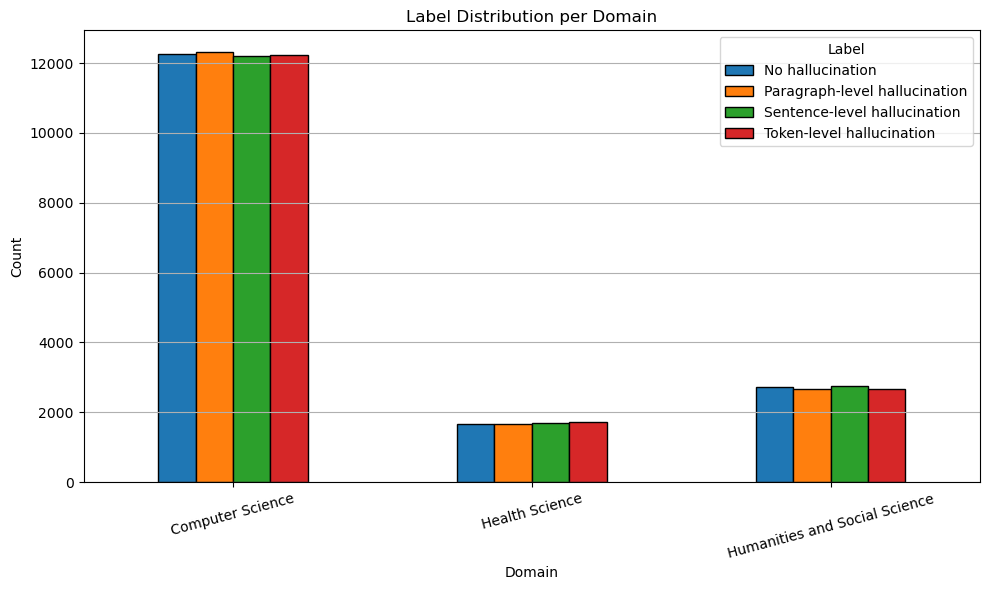

In [367]:
import matplotlib.pyplot as plt

# Plot grouped bar chart
domain_label_counts.plot(kind='bar', figsize=(10, 6), edgecolor='black')

plt.title("Label Distribution per Domain")
plt.xlabel("Domain")
plt.ylabel("Count")
plt.xticks(rotation=15)
plt.legend(title="Label")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


## Classwise Domain Distribution

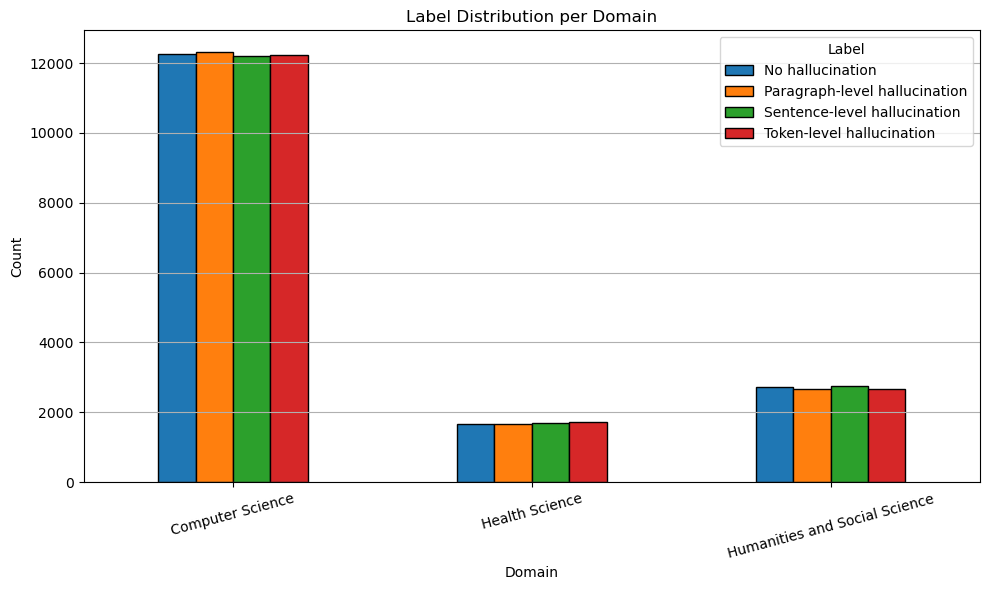

In [368]:
import matplotlib.pyplot as plt

# Plot grouped bar chart
domain_label_counts.plot(kind='bar', figsize=(10, 6), edgecolor='black')

plt.title("Label Distribution per Domain")
plt.xlabel("Domain")
plt.ylabel("Count")
plt.xticks(rotation=15)
plt.legend(title="Label")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [369]:
label_wise_counts = combined_df.groupby("label")["domain"].value_counts().unstack().fillna(0).astype(int)
print(label_wise_counts)

domain                         Computer Science  Health Science  \
label                                                             
No hallucination                          12262            1653   
Paragraph-level hallucination             12323            1654   
Sentence-level hallucination              12202            1691   
Token-level hallucination                 12235            1734   

domain                         Humanities and Social Science  
label                                                         
No hallucination                                        2723  
Paragraph-level hallucination                           2661  
Sentence-level hallucination                            2745  
Token-level hallucination                               2669  


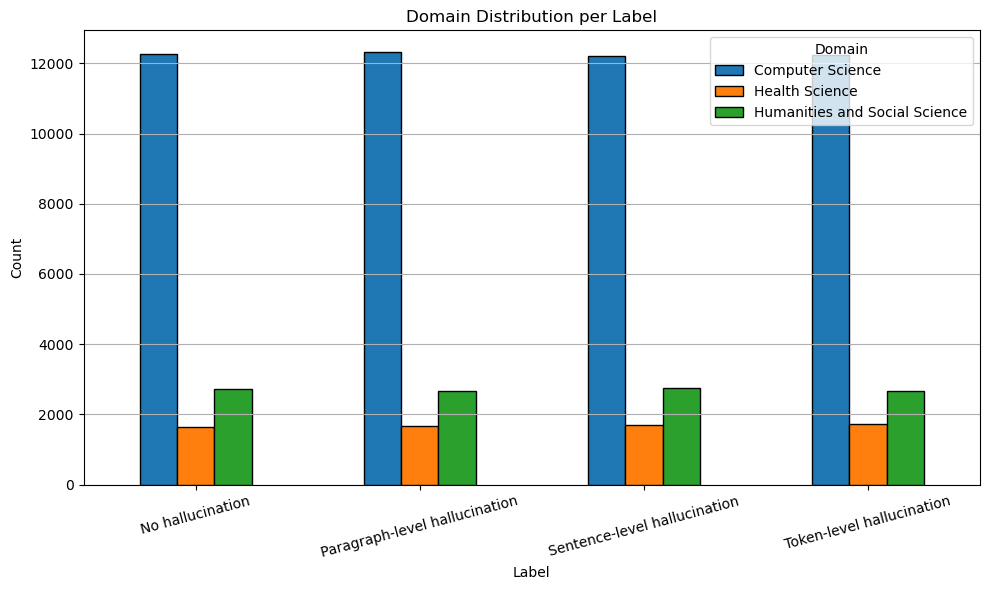

In [370]:
import matplotlib.pyplot as plt

# Plot grouped bar chart
label_wise_counts.plot(kind='bar', figsize=(10, 6), edgecolor='black')

plt.title("Domain Distribution per Label")
plt.xlabel("Label")
plt.ylabel("Count")
plt.xticks(rotation=15)
plt.legend(title="Domain")
plt.grid(axis='y')
plt.tight_layout()
plt.show()